# Introduction

Danny seriously loves Japanese food so in the beginning of 2021, he decides to embark upon a risky venture and opens up a cute little restaurant that sells his 3 favourite foods: sushi, curry and ramen.

Danny’s Diner is in need of your assistance to help the restaurant stay afloat - the restaurant has captured some very basic data from their few months of operation but have no idea how to use their data to help them run the business.

## Problem Statement
Danny wants to use the data to answer a few simple questions about his customers, especially about their visiting patterns, how much money they’ve spent and also which menu items are their favourite. Having this deeper connection with his customers will help him deliver a better and more personalised experience for his loyal customers.

He plans on using these insights to help him decide whether he should expand the existing customer loyalty program - additionally he needs help to generate some basic datasets so his team can easily inspect the data without needing to use SQL.

Danny has provided you with a sample of his overall customer data due to privacy issues - but he hopes that these examples are enough for you to write fully functioning SQL queries to help him answer his questions!

Danny has shared with you 3 key datasets for this case study:

- sales
- menu
- members

You can inspect the entity relationship diagram and example data below.

## Case Study Questions
Each of the following case study questions can be answered using a single SQL statement:

1. What is the total amount each customer spent at the restaurant?
2. How many days has each customer visited the restaurant?
3. What was the first item from the menu purchased by each customer?
4. What is the most purchased item on the menu and how many times was it purchased by all customers?
5. Which item was the most popular for each customer?
6. Which item was purchased first by the customer after they became a member?
7. Which item was purchased just before the customer became a member?
8. What is the total items and amount spent for each member before they became a member?
9. If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?
10. In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?

# Preparation

## Import libraries and setup dependencies

In [51]:
import iplantuml

In [52]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [53]:
%sql sqlite:///dannys_diner.db

## Prepare data base

Create tables:
- Sales
- Menu
- Member

And populated tables by values

Writing output for /Users/dzianiskuziomkin/Repositories/case_study_1/50a9933d-14ff-43ea-9a3b-84e6dc41a656.uml to 50a9933d-14ff-43ea-9a3b-84e6dc41a656.svg


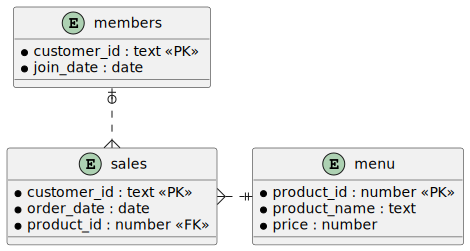

In [72]:
%%plantuml 

@startuml

entity sales {
    * customer_id : text <<PK>>
    * order_date : date
    * product_id : number <<FK>>
}

entity menu {
    * product_id : number <<PK>>
    * product_name : text
    * price : number
}

entity members {
    * customer_id : text <<PK>>
    * join_date : date
}

menu ||.left.{ sales
members |o..{ sales

@enduml

In [ ]:
%%sql

CREATE TABLE sales (
  "customer_id" VARCHAR(1),
  "order_date" DATE,
  "product_id" INTEGER
);

INSERT INTO sales
  ("customer_id", "order_date", "product_id")
VALUES
  ('A', '2021-01-01', '1'),
  ('A', '2021-01-01', '2'),
  ('A', '2021-01-07', '2'),
  ('A', '2021-01-10', '3'),
  ('A', '2021-01-11', '3'),
  ('A', '2021-01-11', '3'),
  ('B', '2021-01-01', '2'),
  ('B', '2021-01-02', '2'),
  ('B', '2021-01-04', '1'),
  ('B', '2021-01-11', '1'),
  ('B', '2021-01-16', '3'),
  ('B', '2021-02-01', '3'),
  ('C', '2021-01-01', '3'),
  ('C', '2021-01-01', '3'),
  ('C', '2021-01-07', '3');
 

CREATE TABLE menu (
  "product_id" INTEGER,
  "product_name" VARCHAR(5),
  "price" INTEGER
);

INSERT INTO menu
  ("product_id", "product_name", "price")
VALUES
  ('1', 'sushi', '10'),
  ('2', 'curry', '15'),
  ('3', 'ramen', '12');
  

CREATE TABLE members (
  "customer_id" VARCHAR(1),
  "join_date" DATE
);

INSERT INTO members
  ("customer_id", "join_date")
VALUES
  ('A', '2021-01-07'),
  ('B', '2021-01-09');

 * sqlite:///dannys_diner.db
(sqlite3.OperationalError) table sales already exists
[SQL: CREATE TABLE sales (
  "customer_id" VARCHAR(1),
  "order_date" DATE,
  "product_id" INTEGER
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


# Solution

## What is the total amount each customer spent at the restaurant?

In [74]:
%%sql

SELECT
    customer_id
    , SUM(price) AS total_amount
FROM
    sales AS s
LEFT JOIN menu AS m ON s.product_id = m.product_id
GROUP BY 
    customer_id
    

 * sqlite:///dannys_diner.db
Done.


customer_id,total_amount
A,76
B,74
C,36
